In [1]:
# import the necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sea 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy as scipy

In [2]:
# import the Stata dataset with the housing data modified to also contain grades and rand. 
df= pd.read_stata('house.dta')

In [3]:
# Look at the first five observations. 
df.head(10)

,age,price,area,agesq,grades,rand
0,48,60000.0,1660,2304.0,94,78.665031
1,83,40000.0,2612,6889.0,94,61.152706
2,58,34000.0,1144,3364.0,93,91.091667
3,11,63900.0,1136,121.0,92,82.843269
4,48,44000.0,1868,2304.0,91,86.785881
5,78,46000.0,1780,6084.0,90,59.637508
6,22,56000.0,1700,484.0,90,89.959587
7,78,38500.0,1556,6084.0,89,88.415070
8,42,60500.0,1642,1764.0,89,75.754196
9,41,55000.0,1443,1681.0,89,82.901779


In [4]:
# Slide 10 shows observations that start with a house with a price of $59,000. Identify these below by identifying all 
# all rows with a price that is equal to $59,000. 
df[df['price']==59000]

,age,price,area,agesq,grades,rand
17,70,59000.0,2458,4900.0,86,99.513565
23,15,59000.0,1215,225.0,81,66.654587
24,7,59000.0,2128,49.0,81,79.447250


In [5]:
# The data on slide 10 either starts with observation number 17, 23, or 24 above. 
df.iloc[17:27]

,age,price,area,agesq,grades,rand
17,70,59000.0,2458,4900.0,86,99.513565
18,26,42000.0,750,676.0,85,79.647575
19,21,71500.0,2106,441.0,85,80.273384
20,24,43000.0,1000,576.0,84,82.347198
21,33,48000.0,1410,1089.0,83,75.582008
22,128,37500.0,2346,16384.0,81,86.530724
23,15,59000.0,1215,225.0,81,66.654587
24,7,59000.0,2128,49.0,81,79.447250
25,0,94000.0,2290,0.0,81,89.132675
26,0,95920.0,2464,0.0,80,90.347794


In [6]:
# The above output does not line up with slide 10. Next, we look at the 10 observations starting with row the 24th index. 
df.iloc[24:34]

,age,price,area,agesq,grades,rand
24,7,59000.0,2128,49.0,81,79.447250
25,0,94000.0,2290,0.0,81,89.132675
26,0,95920.0,2464,0.0,80,90.347794
27,0,95000.0,2240,0.0,79,78.040932
28,0,95900.0,2464,0.0,79,87.203377
29,1,91000.0,2240,1.0,78,83.496582
30,0,96900.0,2464,0.0,78,77.350021
31,104,47000.0,2576,10816.0,78,71.748764
32,18,68500.0,1377,324.0,77,83.898636
33,188,36000.0,2071,35344.0,77,74.499268


In [7]:
# Slide 12 contains summary statistics in Excel for price. Let's calculate these summary statistics in Python. 
# Below is the mean, median, variance, and standard deviation of price. 
df['price'].mean(), df['price'].median(), df['price'].var(), df['price'].std()


(96100.65625, 85900.0, 1868290304.0, 43223.72265625)

In [8]:
# Slide 12, below is the covariance of price and area. The covariance is in the first row, second column. 
df[['price', 'area']].cov()


,price,area
price,1.868291e+09,1.938513e+07
area,1.938513e+07,4.829665e+05


In [9]:
# Slide 12, below is the correlation of price and area. The correlation is in the first row, second column. 
df[['price', 'area']].corr()

,price,area
price,1.000000,0.645339
area,0.645339,1.000000


In [10]:
# Slide 13 
# Next, let's look at the summary statistics for the dataframe. 
df.describe()

,age,price,area,agesq,grades,rand
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,18.009346,96100.656250,2106.728972,1381.567017,80.461059,79.906532
std,32.565845,43223.722656,694.957902,4801.790039,11.644173,11.066620
min,0.000000,26000.000000,735.000000,0.000000,8.000000,46.780296
25%,0.000000,65000.000000,1560.000000,0.000000,76.000000,71.969383
50%,4.000000,85900.000000,2056.000000,16.000000,82.000000,80.090462
75%,22.000000,120000.000000,2544.000000,484.000000,87.000000,87.272881
max,189.000000,300000.000000,5136.000000,35721.000000,95.000000,106.812592


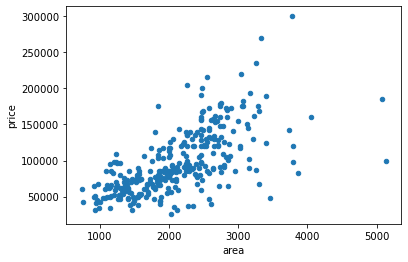

In [11]:
# The format of the output above looks different than Slide 13, but the results are the same. 

# Slide 17 Next, create the scatterplot of price and area.
df.plot.scatter(y= 'price', x='area')

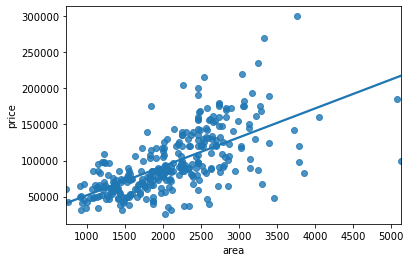

In [12]:
# Slide 18 
ax= sea.regplot(y= df['price'], x= df['area'], ci= None)

In [13]:
# Silently create model with age and agesq to estimate the nonlinear relationship and then add the predicted values to
# the dataframe. 
X= df[['age', 'agesq']]
X= sm.add_constant(X)
Y= df['price']
model= sm.OLS(Y, X).fit()
y_hat= model.predict(X)
df['y_hat']= y_hat


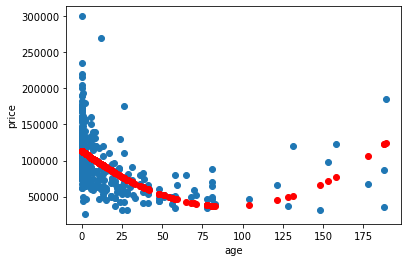

In [14]:
# Slide 23
fig, ax= plt.subplots()
ax.scatter(y=df['price'], x=df['age'])
ax.scatter(y=df['y_hat'], x=df['age'], color= 'red')
ax.set_xlabel('age')
ax.set_ylabel('price')
plt.show
del df['y_hat']

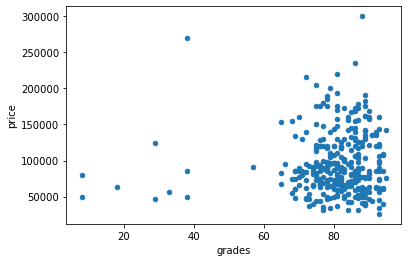

In [15]:
# Slide 25
df.plot.scatter(y= 'price', x='grades')

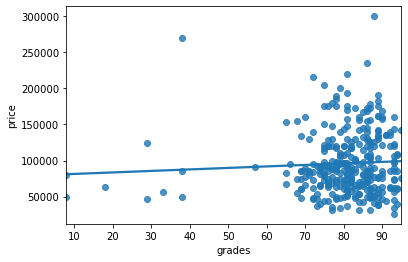

In [16]:
# Slide 26
ax= sea.regplot(y= df['price'], x= df['grades'], ci= None)


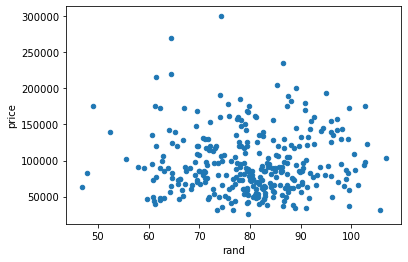

In [17]:
# Slide 29
df.plot.scatter(y= 'price', x='rand')

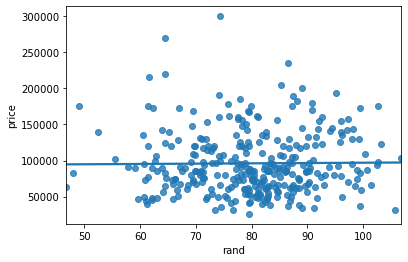

In [18]:
# Slide 30
ax= sea.regplot(y= df['price'], x= df['rand'], ci= None)

In [19]:
# Slide 33 - Area 
X= df['area']
X= sm.add_constant(X)
Y= df['price']
model= sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.36e-39
Time:                        16:15:34   Log-Likelihood:                -3794.9
No. Observations:                 321   AIC:                             7594.
Df Residuals:                     319   BIC:                             7601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.154e+04   5900.313      1.956      0.0

In [20]:
# Slide 33 - Grades 
X= df['grades']
X= sm.add_constant(X)
Y= df['price']
model= sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.008
Date:                Tue, 29 Sep 2020   Prob (F-statistic):              0.316
Time:                        16:15:34   Log-Likelihood:                -3880.9
No. Observations:                 321   AIC:                             7766.
Df Residuals:                     319   BIC:                             7773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.934e+04   1.69e+04      4.703      0.0

In [21]:
# Slide 33 - Rand
X= df['rand']
X= sm.add_constant(X)
Y= df['price']
model= sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03881
Date:                Tue, 29 Sep 2020   Prob (F-statistic):              0.844
Time:                        16:15:34   Log-Likelihood:                -3881.4
No. Observations:                 321   AIC:                             7767.
Df Residuals:                     319   BIC:                             7774.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.266e+04   1.76e+04      5.253      0.0

In [22]:
# Slide 44 
X= df['area']
X= sm.add_constant(X)
Y= df['price']
model= sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.36e-39
Time:                        16:15:34   Log-Likelihood:                -3794.9
No. Observations:                 321   AIC:                             7594.
Df Residuals:                     319   BIC:                             7601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.154e+04   5900.313      1.956      0.0

In [23]:
# Slide 49 - Area 
X= df['area']
X= sm.add_constant(X)
Y= df['price']
model= sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.36e-39
Time:                        16:15:34   Log-Likelihood:                -3794.9
No. Observations:                 321   AIC:                             7594.
Df Residuals:                     319   BIC:                             7601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.154e+04   5900.313      1.956      0.0

In [24]:
# Slidse 58 and 59. 
# Below creates a new variable "scaled" which takes each value of 
# area, subtracts the mean of area, and then divides by the standard deviation of area. 
df= df.iloc[0:25].copy()
df['scaled']= (df['area']- df['area'].mean())/df['area'].std()
df.head(25)

,age,price,area,agesq,grades,rand,scaled
0,48,60000.0,1660,2304.0,94,78.665031,0.106096
1,83,40000.0,2612,6889.0,94,61.152706,2.191225
2,58,34000.0,1144,3364.0,93,91.091667,-1.024079
3,11,63900.0,1136,121.0,92,82.843269,-1.041601
4,48,44000.0,1868,2304.0,91,86.785881,0.561671
5,78,46000.0,1780,6084.0,90,59.637508,0.368928
6,22,56000.0,1700,484.0,90,89.959587,0.193707
7,78,38500.0,1556,6084.0,89,88.415070,-0.121691
8,42,60500.0,1642,1764.0,89,75.754196,0.066672
9,41,55000.0,1443,1681.0,89,82.901779,-0.369191


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.6521
Date:                Tue, 29 Sep 2020   Prob (F-statistic):              0.428
Time:                        16:15:35   Log-Likelihood:                -267.90
No. Observations:                  25   AIC:                             539.8
Df Residuals:                      23   BIC:                             542.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.115e+04   2274.066     22.494      0.0

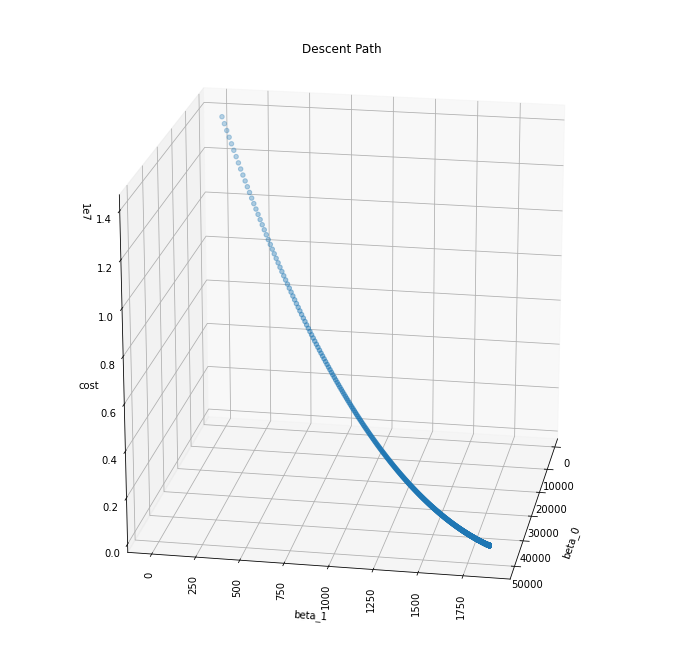

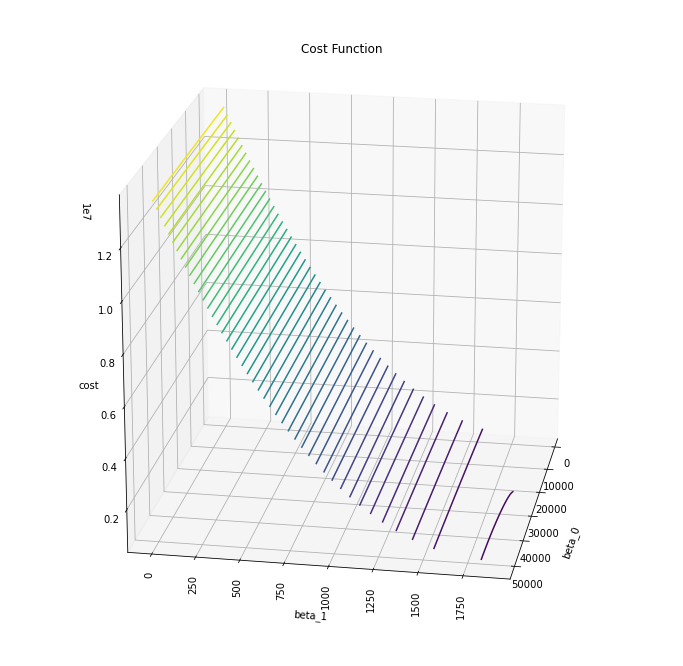

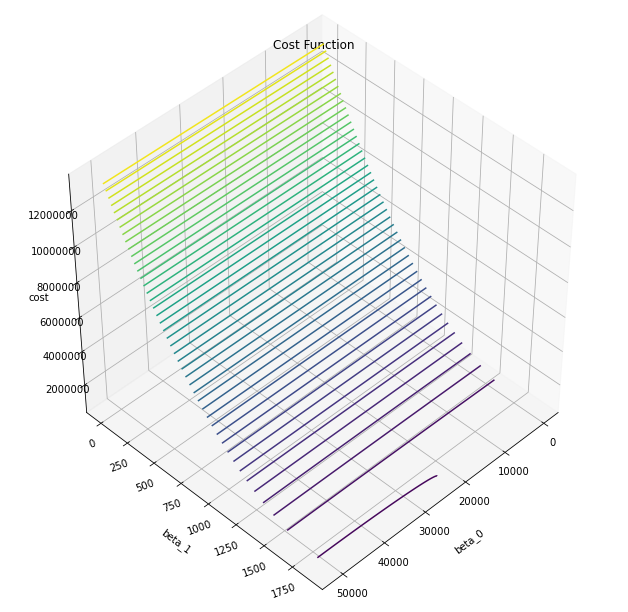

In [25]:
# Slides 65 to 78. 

%reset -f
import pandas as pd
import numpy as np
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy as scipy
%matplotlib inline
############################# Attributions ##########################
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# https://pythonprogramming.net/3d-graphing-pandas-matplotlib/
# https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe
# https://www.python-course.eu/matplotlib_contour_plot.php
# http://www.adeveloperdiary.com/data-science/how-to-visualize-gradient-descent-using-contour-plot-in-python/
# https://www.coursera.org/learn/machine-learning
##################################################


pd.set_option('display.float_format', lambda x: '%.5f' % x)

df= pd.read_stata('house.dta')
df.head()

# Keep first 25 obs.
df= df.iloc[0:25]
df

# Scale house price.
df['scaled']= (df['area']- df['area'].mean())/df['area'].std()
df

# Initial guesses for B0 and B1 are zero.
coeff_guess= np.asarray([[0], [0]], dtype='int64')
# Set the learning rate paramater.
alpha= .01/len(df)

results=[]
# The code below does not use linear algebra on purpose. 
# This talk was given to accounting and finance folks so I wanted to make the equations below more user friendly
# for that audience. 

# Gradient descent is run with 1,000 iterations below.
for i in range(0,1000):
    one= (coeff_guess[0,0]+ (coeff_guess[1,0]*df['scaled'])- df['price'] ).sum()
    two= (((coeff_guess[0,0] + coeff_guess[1,0]*df['scaled']) - df['price']) * df['scaled'] ).sum()
    derivatives= np.asarray([[one], [two]], dtype='int64')
    # Initial guess.
    if i==0:
        coeff_guess= np.asarray([[0], [0]], dtype='int64')
        cost= alpha* (1/2)*((coeff_guess[0,0]+ (coeff_guess[1,0]*df['scaled'])- df['price'])**2).sum()
        results.append([i, coeff_guess[0,0], coeff_guess[1,0], cost])
    # Guesses for all iterations other than the first one.
    else:
        coeff_guess= coeff_guess - (alpha*derivatives)
        cost= alpha* (1/2)*((coeff_guess[0,0]+ (coeff_guess[1,0]*df['scaled'])- df['price'])**2).sum()
        results.append([i, coeff_guess[0,0], coeff_guess[1,0], cost])

results

# Turn the results list into a dataframe.
df2= pd.DataFrame(results, columns= ['iteration', 'beta_0', 'beta_1', 'cost'])

df2['iteration']= df2['iteration'] +1
# Below output is comparable to house_gradient.xlsx results. You can see that, within rounding errors, the paramter
# estimates match.
df2.head(3)
df2.tail(3)

# Create X matrix with a constant. Below lines transform df columns into vectors or matrices and then 
# estimates and OLS model to compare to the gradient descen estimates later.
X_model= sm.add_constant(df['scaled'])
Y= df['price']

model=sm.OLS(Y, X_model)
output= model.fit()
output.params
print(output.summary())

df2.to_excel('first_three_last_three.xlsx', index= False)

# Below creates a graph of the gradient descent path based on each B0 and B1 guess and the cost function with 
# that parameter combination.
fig=plt.figure(figsize=(12,12))
gd= plt.axes(projection='3d')
plt.yticks(rotation=90)
gd.view_init(20, 10)
gd.set_title('Descent Path')
gd.scatter(df2['beta_0'], df2['beta_1'], df2['cost'])
gd.set_xlabel('beta_0', labelpad=13)
gd.set_ylabel('beta_1', labelpad=13)
gd.set_zlabel('cost')
fig.savefig('descent.pdf')

# The graphs make it appear that the constant is less than $50,000. This appears strange, so I am double checking the 
# cost function when B0 is around  45- 49K and seeing where the minimum of the cost function is. No exceptions noted. p/f/r.
df2[df2['cost']==df2['cost'].min()]
df2.iloc[200:300]

# Above we have each combination of B0 and B1, but we don't have the cost function for all combinations of B0 and B1. 
# Next, we write a loop, using linear algebra this time, to "sweep out" the cost function for all combinations of each 
# B0 and B1. The graph created from this will show more than just the gradient descent path because it will show, for example,
# for each B0 the cost with ALL of the other values of B1 in the range of B1 estimates. You can see this with the nested loops.

SST_Mat= np.zeros((1000,1000))
X_model= np.asarray(X_model)
Y= np.asarray(Y)
Y= Y.reshape((25,1))
G, H= np.meshgrid(df2['beta_0'], df2['beta_1'])

for i,j in enumerate(df2['beta_0']):
    for e,f in enumerate(df2['beta_1']):
        beta_hat= np.asarray([[j], [f]], dtype='int64')
        XB= np.matmul(X_model,beta_hat)
        Epsilon= np.subtract(XB,Y)
        SST=  alpha*(1/2)* np.matmul(Epsilon.T,Epsilon)
        SST_Mat[i,e]= SST

fig=plt.figure(figsize= (12,12))
ax= plt.axes(projection='3d')
plt.yticks(rotation=90)
ax.contour3D(G, H, SST_Mat, 50, cmap='viridis')
ax.set_title('Cost Function')
ax.set_xlabel('beta_0', labelpad=13)
ax.set_ylabel('beta_1', labelpad=13)
ax.set_ylabel('beta_1')
ax.set_zlabel('cost')
ax.view_init(20, 10)
fig.savefig('plane.pdf')

# Rg: Note that it may appear that the value of B0 is actually less than 50,000 but that is just 
# because of the rotation of the graph. See below.

fig=plt.figure(figsize= (11,11))
ax= plt.axes(projection='3d')
plt.yticks(rotation=20)
ax.contour3D(G, H, SST_Mat, 50, cmap='viridis')
ax.set_title('Cost Function')
ax.ticklabel_format(style='plain')
ax.set_xlabel('beta_0', labelpad=13)
ax.set_ylabel('beta_1', labelpad=13)
ax.set_ylabel('beta_1')
ax.set_zlabel('cost')
ax.view_init(45, 45)

